In [1]:
#단순 스트레이트기사 아닌 분석기사 몇 개 선정, 그 안에서 단어 크롤링
#링크 목록 파일로 정리해서 불러온 후 분석하기
from IPython.core.display import display, HTML

wide_style = ("<style> #notebook { padding-top:0px !important;} .container {width:100% !important; } .end_space { min-height: 0px !important;} </style>")

display(HTML(wide_style))

In [2]:
url_list = []

f = open('./queendom_artlist.txt','r')

artlist = f.readlines()

In [3]:
from bs4 import BeautifulSoup as bs
from collections import OrderedDict
import urllib
import sys

#기사 내용 본문 수집

sys.stdout = open('queendom_articles_text.txt', 'w', encoding = "utf-8")
article_list = []

print("text")
for url in artlist:
    
    articles = OrderedDict()
    with urllib.request.urlopen(url) as url:
        doc = url.read()
        soup = bs(doc, "html.parser")
            
        title = soup.find_all("h3", class_="tit_view")[0].text.strip()
        articles["title"] = title
        #print(title)
        
        div = soup.find_all("div", class_="news_view")[0]
        unwanted = div.find("figure")
        if unwanted:
            unwanted.extract()
        body = div.text.strip()
        print(body)
        articles["body"] = body
        
            

In [4]:
import pandas as pd
article_data = pd.read_table("queendom_articles_text.txt")

article_data

,text
0,아이즈 ize 글 황효진 (칼럼니스트)
1,“천재 아니에요?” Mnet ‘퀸덤’에 함께 출연한 팀들이 입을 모아 이렇게 말한 ...
2,"“‘LATATA’부터 ‘Uh-Oh’까지 해야 할 뮤직비디오, 입어야 할 의상까지 제..."
3,그동안 걸그룹 멤버들은 프로듀싱 능력을 적극적으로 내세우지 않는 경우가 대부분이었다...
4,아이즈 ize 글 김리은
...,...
336,2NE1의 'FIRE' 재해석에 이어 자신들의 곡 '싫다고 말해'로는 섬뜩한 분위기...
337,차곡차곡 쌓은 (여자)아이들의 힘은 최종 신곡 'LION'으로 폭발했다. 전쟁터에서...
338,또한 소연이 제시하는 주제를 확실히 이해하고 소화하는 멤버들의 힘도 빼놓을 수 없다...
339,"비록 컴백쇼를 쟁취하지는 못했지만, (여자)아이들은 새로운 '퀸'이자 '사자'가 맞..."


In [5]:
article_data['text'] = article_data['text'].str.replace("[^A-Za-zㄱ-ㅎㅏ-ㅣ가-힣 ]","")
article_data['text'] = article_data['text'].str.replace("너나 해","너나_해")
article_data['text'] = article_data['text'].str.replace("&#39;","")


In [6]:
import konlpy
from konlpy.tag import Okt
from ckonlpy.tag import Twitter as Okt

In [7]:
okt = Okt()
okt.add_dictionary('오마이걸', 'Noun')
okt.add_dictionary('러블리즈', 'Noun')
okt.add_dictionary('마마무', 'Noun')
okt.add_dictionary('여자아이들', 'Noun')
okt.add_dictionary('(여자)아이들', 'Noun')
okt.add_dictionary('에이오에이', 'Noun')
okt.add_dictionary('AOA', 'Noun')
okt.add_dictionary('역대급', 'Noun')
okt.add_dictionary('뉴트로', 'Noun')
okt.add_dictionary('조욱형', 'Noun')
okt.add_dictionary('정예인', 'Noun')
okt.add_dictionary('효정', 'Noun')
okt.add_dictionary('고민', 'Noun')
okt.add_dictionary('시선', 'Noun')
okt.add_dictionary('팬', 'Noun')
okt.add_dictionary('여왕', 'Noun')
okt.add_dictionary('효정', 'Noun')
okt.add_dictionary('재도약', 'Noun')
okt.add_dictionary('효정', 'Noun')
okt.add_dictionary('혜정', 'Noun')
okt.add_dictionary('민니', 'Noun')
okt.add_dictionary('서로', 'Noun')
okt.add_dictionary('논의', 'Noun')
okt.add_dictionary('건덕지', 'Noun')
okt.add_dictionary('경연', 'Noun')
okt.add_dictionary('개월', 'Noun')
okt.add_dictionary('경연곡', 'Noun')
okt.add_dictionary('화제성', 'Noun')
okt.add_dictionary('걸크러쉬', 'Noun')
okt.add_dictionary('등극', 'Noun')
okt.add_dictionary('최약체', 'Noun')
okt.add_dictionary('최하위', 'Noun')
okt.add_dictionary('마음고생', 'Noun')
okt.add_dictionary('제작진', 'Noun')
okt.add_dictionary('재발견', 'Noun')
okt.add_dictionary('성장형', 'Noun')
okt.add_dictionary('팬도라', 'Noun')
okt.add_dictionary('LATATA', 'Noun')
okt.add_dictionary('전소연', 'Noun')
okt.add_dictionary('기승전결', 'Noun')
okt.add_dictionary('도입부', 'Noun')
okt.add_dictionary('무게감', 'Noun')
okt.add_dictionary('LATATA', 'Noun')
okt.add_dictionary('K팝', 'Noun')
okt.add_dictionary('확연하게', 'Adverb')
okt.add_dictionary('너나_해', 'Noun')
okt.add_dictionary('프로듀싱', 'Noun')

c:\users\super\appdata\local\programs\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
c:\users\super\appdata\local\programs\python\python37\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [8]:
okt.pos('너나_해')

[('너나_해', 'Noun')]

In [9]:
stopwords=['의','가','이','은','들','는','좀','잘','차','걍','위','과','도','를','을','으로','이렇','며','면','만','자','엑','수','에','보','것','와','좋','같','없','적','그','다','인','로']

X_review=[]
for sentence in article_data['text']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_review.append(temp_X)
    
X_review


[['아이즈', 'ize', '글', '황효진', '칼럼니스트'],
 ['천재',
  '아니',
  '에요',
  'Mnet',
  '퀸덤',
  '함께',
  '출연',
  '한',
  '팀',
  '입',
  '모으다',
  '이렇게',
  '말',
  '한',
  '처럼',
  '전소연',
  '프로듀싱',
  '한',
  'LATATA',
  '무대',
  '보다',
  '사람',
  '이라',
  '누구',
  '나',
  '같다',
  '생각',
  '하다',
  '밖에',
  '없다',
  '이다',
  '여섯',
  '팀',
  '걸그룹',
  '컴백쇼',
  '놓다',
  '경쟁',
  '하다',
  '프로그램',
  '에서',
  '데뷔',
  '시기',
  '가장',
  '늦다',
  '여자아이들',
  '종종',
  '막내',
  '불리',
  '지만',
  '각자',
  '히트',
  '곡',
  '재탄생',
  '시키다',
  '첫',
  '번째',
  '미션',
  '에서',
  '가장',
  '높다',
  '점수',
  '받다',
  '우승',
  '한',
  '팀',
  '들이다',
  '중심',
  '에는',
  'LATATA',
  '직접',
  '작사',
  '작곡',
  '하',
  '기도',
  '하다',
  '전소연',
  '프로듀싱',
  '있다',
  '주술사',
  '콘셉트',
  '극적',
  '제안',
  '하다',
  '민니',
  '에게',
  '인트로',
  '태국어',
  '주문',
  '맡다',
  '거나',
  '주술',
  '걸리다',
  '듯',
  '한',
  '댄스',
  '브레이크',
  '넣다',
  '등',
  '곡',
  '무대',
  '전체',
  '주',
  '도적',
  '연출',
  '하다',
  '다그',
  '결과',
  '퀸덤',
  '첫',
  '회',
  '에서의',
  'LATATA',
  '원',
  '곡',
  '편곡',
  '한',
  '버전',
  '이아',
 

In [10]:
word = sum(X_review, [])

In [11]:
from ckonlpy.tag import Postprocessor


In [12]:
for i in range(0,len(word)):
    tags = okt.pos(word[i])
    tags

In [13]:
tagged_vocabs = [okt.pos(word) for word in word]
tagged_vocabs

[[('아이즈', 'Noun')],
 [('ize', 'Alpha')],
 [('글', 'Noun')],
 [('황효진', 'Noun')],
 [('칼럼니스트', 'Noun')],
 [('천재', 'Noun')],
 [('아니', 'Adverb')],
 [('에요', 'Josa')],
 [('Mnet', 'Alpha')],
 [('퀸덤', 'Noun')],
 [('함께', 'Adverb')],
 [('출연', 'Noun')],
 [('한', 'Verb')],
 [('팀', 'Noun')],
 [('입', 'Noun')],
 [('모으다', 'Verb')],
 [('이렇게', 'Adverb')],
 [('말', 'Noun')],
 [('한', 'Verb')],
 [('처럼', 'Noun')],
 [('전소연', 'Noun')],
 [('프로듀싱', 'Noun')],
 [('한', 'Verb')],
 [('LATATA', 'Noun')],
 [('무대', 'Noun')],
 [('보다', 'Josa')],
 [('사람', 'Noun')],
 [('이라', 'Josa')],
 [('누구', 'Noun')],
 [('나', 'Noun')],
 [('같다', 'Adjective')],
 [('생각', 'Noun')],
 [('하다', 'Verb')],
 [('밖에', 'Josa')],
 [('없다', 'Adjective')],
 [('이다', 'Josa')],
 [('여섯', 'Noun')],
 [('팀', 'Noun')],
 [('걸그룹', 'Noun')],
 [('컴백쇼', 'Noun')],
 [('놓다', 'Verb')],
 [('경쟁', 'Noun')],
 [('하다', 'Verb')],
 [('프로그램', 'Noun')],
 [('에서', 'Josa')],
 [('데뷔', 'Noun')],
 [('시기', 'Noun')],
 [('가장', 'Noun')],
 [('늦다', 'Verb')],
 [('여자아이들', 'Noun')],
 [('종종', 'Noun')]

In [31]:
frequent= []
for vocabs in tagged_vocabs:    
    for word, tag in vocabs:
        if tag in ['Noun']:
            frequent.append(word)

frequent.remove('입')
frequent.remove('시')
frequent.remove('걸')
frequent.remove('듯')
frequent.remove('등')
frequent.remove('원')
frequent.remove('또')
frequent.remove('니')
frequent.remove('절')
frequent.remove('부')
frequent.remove('랩')
frequent.remove('후')
frequent.remove('안')
frequent.remove('선')
frequent.remove('여주')
frequent.remove('이자')
frequent.remove('때')
frequent.remove('버')
frequent.remove('주')
frequent.remove('두')
frequent.remove('알')
frequent.remove('었다')
frequent.remove('선')
frequent.remove('지라')
frequent.remove('다운')
frequent.remove('었다')
frequent.remove('임')
frequent.remove('게')
frequent.remove('대해')
frequent.remove('입다')
frequent.remove('지다')
frequent.remove('더')
frequent.remove('어요')
frequent.remove('씨')
frequent.remove('뿐')
frequent.remove('이기')

In [32]:
print(frequent)

In [33]:
from collections import Counter
freq_counts = Counter(frequent)

sys.stdout = open('frequent_words.txt','w')
print(freq_counts.most_common())


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path
import numpy as np

In [35]:
stopwords = set(STOPWORDS)
stopwords.add('의')
stopwords.add('가')
stopwords.add('이')
stopwords.add('은')
stopwords.add('들')
stopwords.add('는')
stopwords.add('좀')
stopwords.add('있다')
stopwords.add('잘')
stopwords.add('리다')
stopwords.add('요')
stopwords.add('어요')
stopwords.add('차')
stopwords.add('걍')
stopwords.add('해')
stopwords.add('면서')
stopwords.add('처럼')
stopwords.add('거')
stopwords.add('위')
stopwords.add('과')
stopwords.add('도')
stopwords.add('를')
stopwords.add('을')
stopwords.add('으로')
stopwords.add('이렇')
stopwords.add('며')
stopwords.add('면')
stopwords.add('만')
stopwords.add('자')
stopwords.add('수')
stopwords.add('에')
stopwords.add('보')
stopwords.add('것')
stopwords.add('와')
stopwords.add('좋')
stopwords.add('같')
stopwords.add('없')
stopwords.add('적')
stopwords.add('그')
stopwords.add('다')
stopwords.add('인')
stopwords.add('로')

In [36]:
cloud = WordCloud(width=900, height=600, 
                  font_path="NotoSansCJKkr-Regular.otf",
                  stopwords=stopwords, background_color='white')

In [37]:
cloud = cloud.fit_words(freq_counts)

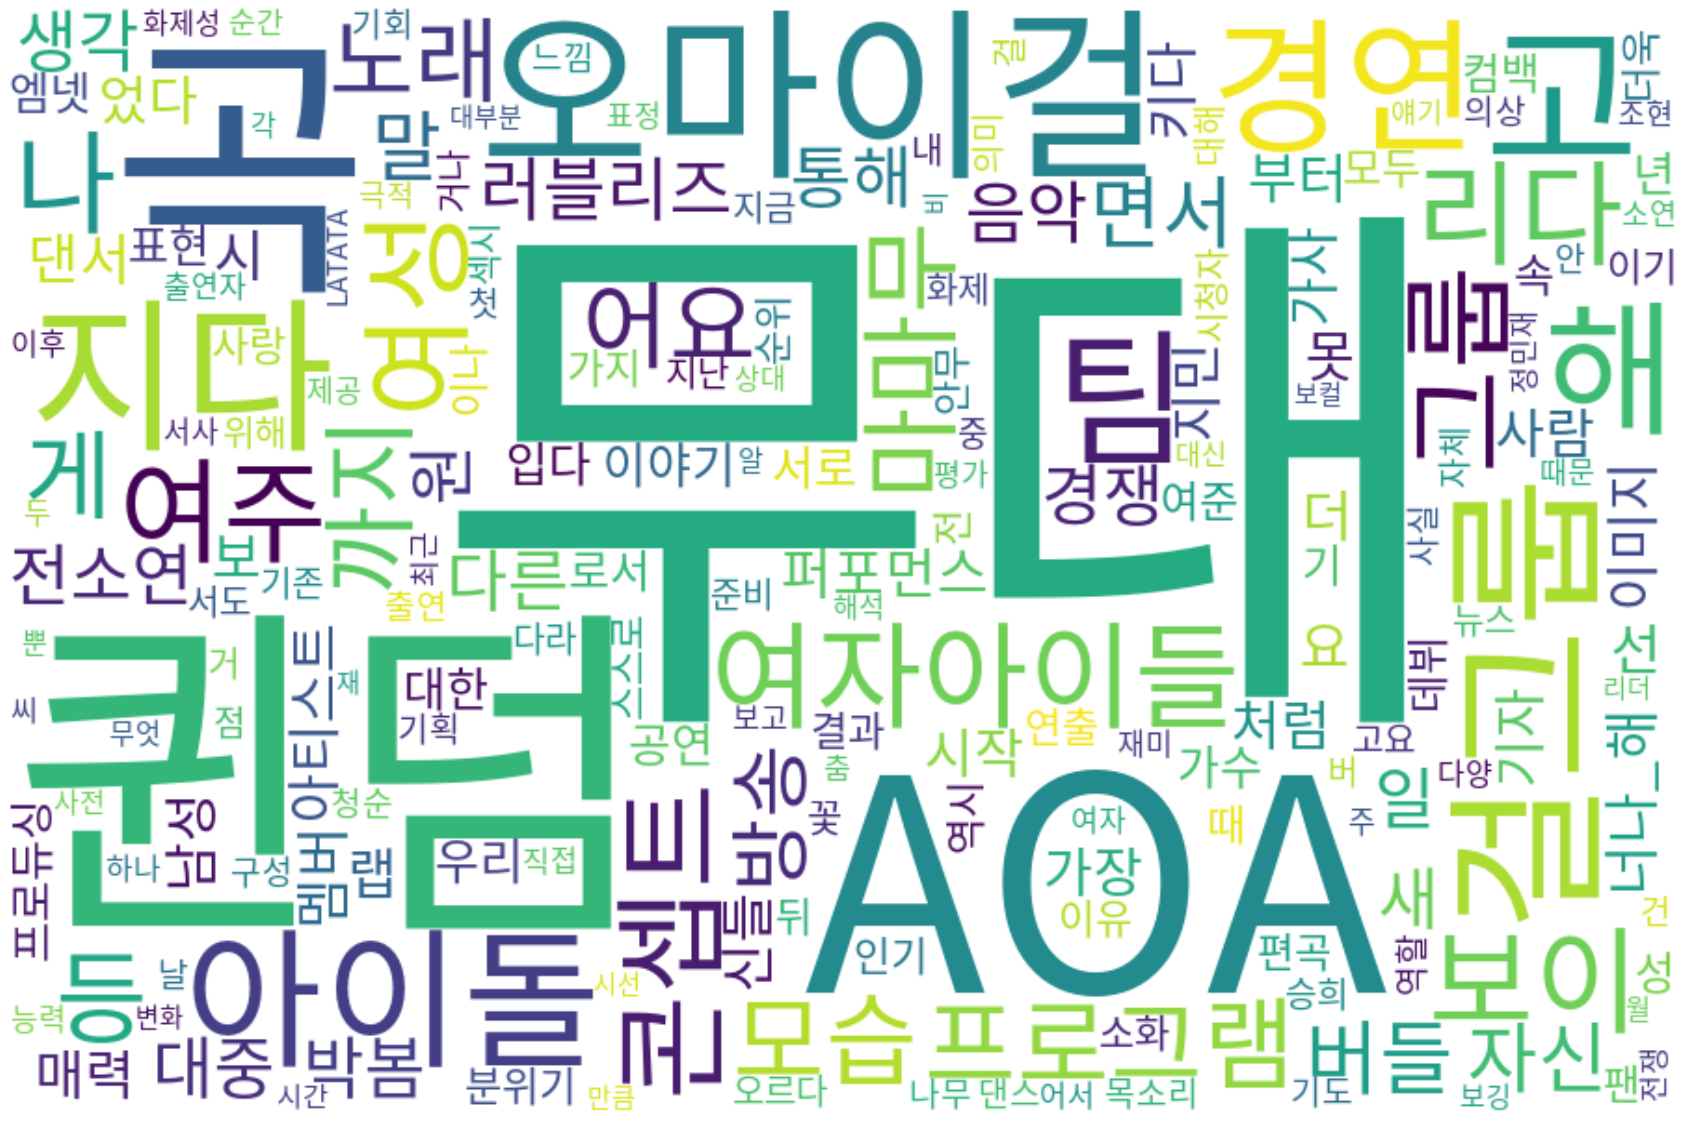

In [29]:
plt.figure(figsize=(30, 40))
plt.axis('off')
plt.imshow(cloud, interpolation="bilinear")
plt.show()